In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [6]:
house_data = pd.read_csv("C:/Users/User/Desktop/Artificial-Intelligence-Assignment/assets/ehr/data.csv")

In [7]:
house_data.shape

(1460, 81)

In [8]:
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
house_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
house_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [11]:
data = pd.DataFrame()

In [12]:
type(data)

pandas.core.frame.DataFrame

In [13]:
data["GrLivArea"] = house_data["GrLivArea"]

In [14]:
data["TotalBsmtSF"] = house_data["TotalBsmtSF"]

In [15]:
data["SalePrice"] = house_data["SalePrice"]

In [16]:
data.shape

(1460, 3)

In [17]:
data.head()

,GrLivArea,TotalBsmtSF,SalePrice
0,1710,856,208500
1,1262,1262,181500
2,1786,920,223500
3,1717,756,140000
4,2198,1145,250000


In [18]:
data.isnull().sum()

GrLivArea      0
TotalBsmtSF    0
SalePrice      0
dtype: int64

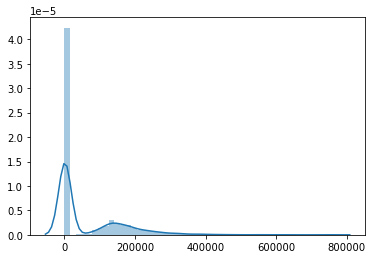

In [19]:
sns.distplot(data)

plt.show()

<bound method DataFrame.count of       GrLivArea  TotalBsmtSF  SalePrice
0          1710          856     208500
1          1262         1262     181500
2          1786          920     223500
3          1717          756     140000
4          2198         1145     250000
...         ...          ...        ...
1455       1647          953     175000
1456       2073         1542     210000
1457       2340         1152     266500
1458       1078         1078     142125
1459       1256         1256     147500

[1460 rows x 3 columns]>

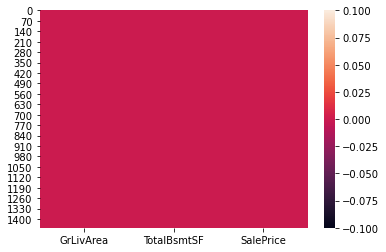

In [20]:
sns.heatmap(data.isnull())
data.count

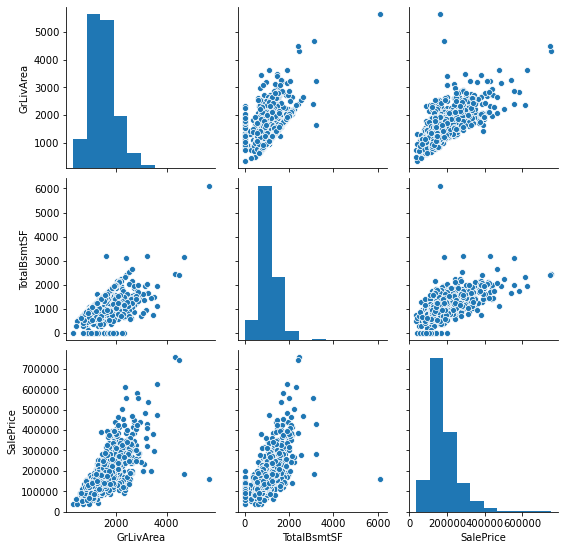

In [21]:
sns.pairplot(data)

In [22]:
from sklearn.utils import shuffle

In [23]:
data = shuffle(data, random_state=0)
data = data.reset_index(drop=True)

In [24]:
y = data["SalePrice"]

In [25]:
data.drop(["SalePrice"],axis=1,inplace=True)

In [26]:
x = data

In [27]:
x.head()

,GrLivArea,TotalBsmtSF
0,2515,2035
1,1578,806
2,1203,709
3,2022,1160
4,1092,525


In [28]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [33]:
#import the libraries
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

Using TensorFlow backend.


In [34]:
#make the model
nuralNetworkModel = Sequential()

# The Input Layer :
nuralNetworkModel.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
nuralNetworkModel.add(Dense(256, kernel_initializer='normal',activation='relu'))
nuralNetworkModel.add(Dense(256, kernel_initializer='normal',activation='relu'))
nuralNetworkModel.add(Dense(256, kernel_initializer='normal',activation='relu'))
nuralNetworkModel.add(Dense(256, kernel_initializer='normal',activation='relu'))
nuralNetworkModel.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
nuralNetworkModel.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
nuralNetworkModel.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
nuralNetworkModel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               384       
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_6 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [35]:
nuralNetworkModel.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Train on 782 samples, validate on 386 samples
Epoch 1/100
782/782 [==============================] - 0s 497us/step - loss: 75863.3911 - mean_absolute_error: 75863.3828 - val_loss: 41261.1379 - val_mean_absolute_error: 41261.1406
Epoch 2/100
782/782 [==============================] - 0s 409us/step - loss: 33926.1753 - mean_absolute_error: 33926.1758 - val_loss: 32148.5229 - val_mean_absolute_error: 32148.5215
Epoch 3/100
782/782 [==============================] - 0s 408us/step - loss: 33434.5102 - mean_absolute_error: 33434.5078 - val_loss: 32170.1132 - val_mean_absolute_error: 32170.1094
Epoch 4/100
782/782 [==============================] - ETA: 0s - loss: 32958.6712 - mean_absolute_error: 32958.679 - 0s 436us/step - loss: 33309.5795 - mean_absolute_error: 33309.5820 - val_loss: 32161.2413 - val_mean_absolute_error: 32161.2402
Epoch 5/100
782/782 [==============================] - 0s 359us/step - loss: 33701.6629 - mean_absolute_error: 33701.6719 - val_loss: 35379.4255 - val_mean_abso

Epoch 45/100
782/782 [==============================] - 0s 275us/step - loss: 34009.1011 - mean_absolute_error: 34009.1016 - val_loss: 36155.2324 - val_mean_absolute_error: 36155.2344
Epoch 46/100
782/782 [==============================] - 0s 246us/step - loss: 33426.3843 - mean_absolute_error: 33426.3867 - val_loss: 32099.5424 - val_mean_absolute_error: 32099.5410
Epoch 47/100
782/782 [==============================] - 0s 482us/step - loss: 34030.4372 - mean_absolute_error: 34030.4375 - val_loss: 35850.0686 - val_mean_absolute_error: 35850.0703
Epoch 48/100
782/782 [==============================] - 0s 307us/step - loss: 33285.4693 - mean_absolute_error: 33285.4648 - val_loss: 33806.3971 - val_mean_absolute_error: 33806.4023
Epoch 49/100
782/782 [==============================] - 0s 316us/step - loss: 33595.7992 - mean_absolute_error: 33595.8086 - val_loss: 34509.6667 - val_mean_absolute_error: 34509.6641
Epoch 50/100
782/782 [==============================] - 0s 440us/step - loss: 34

782/782 [==============================] - 0s 251us/step - loss: 33660.0548 - mean_absolute_error: 33660.0547 - val_loss: 35972.2749 - val_mean_absolute_error: 35972.2734
Epoch 90/100
782/782 [==============================] - 0s 249us/step - loss: 35901.5756 - mean_absolute_error: 35901.5781 - val_loss: 32699.2489 - val_mean_absolute_error: 32699.2441
Epoch 91/100
782/782 [==============================] - 0s 248us/step - loss: 33970.9399 - mean_absolute_error: 33970.9375 - val_loss: 32091.9686 - val_mean_absolute_error: 32091.9688
Epoch 92/100
782/782 [==============================] - 0s 269us/step - loss: 33605.0393 - mean_absolute_error: 33605.0352 - val_loss: 33396.9518 - val_mean_absolute_error: 33396.9492
Epoch 93/100
782/782 [==============================] - 0s 258us/step - loss: 33753.6637 - mean_absolute_error: 33753.6602 - val_loss: 35241.0745 - val_mean_absolute_error: 35241.0742
Epoch 94/100
782/782 [==============================] - 0s 253us/step - loss: 35968.9591 - me

In [36]:
predictValues = nuralNetworkModel.predict(X_test)

In [37]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictValues))
print('MSE:', metrics.mean_squared_error(y_test, predictValues))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictValues)))

MAE: 31700.987719392124
MSE: 2227330288.530057
RMSE: 47194.60020521476
